# Digital Signal Processing
## Convolution and Correlation

### MsCV - ViBOT - MAIA

In [85]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm
from array import array
from scipy import signal
from skimage.filters import threshold_otsu



Pretty printing has been turned OFF


## Exercise 1- 1D Convolution

**1.1** Defining a signal $x$ and an impulse response $h$ as parameters, write a program `conv_fn` to compute the convolution product $y=h*x$. Do not use the python or matlab function and just consider zero padding to solve the border problem.

**1.2** Test your function, while using the following signal ($x[n] = \{\underline{1},2,3,4\}$) and following filters, ($\delta[k]$, $H[k]$, $e^{k}$, and $h = \{-1, 1\}$), respectively.

**1.3** Consider the previous input signal, write it's extended version while considering `symmetry`, `periodic` and `constant values` padding and $h = H[k-5]$



In [32]:
def conv_fn(x,h):
    #f = np.append([0,0,0,0,1,x,0,0,0,0])
    x = np.concatenate((x, np.zeros(h.shape[0]-1)))
    y = np.zeros(x.shape)
    
    for n in range(y.shape[0]):
        for k in range(h.shape[0]):
                y[n] += h[k] * x[n-k]
    
    return y


#Impulse
def dirac(n=0, N=20):
    if n> N-1:
        raise ValueError('n should be inferior to N-1')
        
        
    s = np.zeros((N,))
    s[n] = 1
    
    return s

#H(k)
def step(n=0, N=20):
    if n> N-1:
        raise ValueError('n should be inferior to N-1')
        
        
    u = np.zeros((N,))
    
    u[n : N] =1
    
    return u


[ 1.  2.  3.  4.  0.  0.  0.]
[ 1.  2.  3.  4.  0.  0.  0.]
[  1.   3.   6.  10.   9.   7.   4.]
[  1.   3.   6.  10.   9.   7.   4.]
[  1.           4.71828183  15.82561976  47.01849461  73.21136946
  89.81283517  80.34214769]
[-1. -1. -1. -1.  4.]


<Container object of 3 artists>

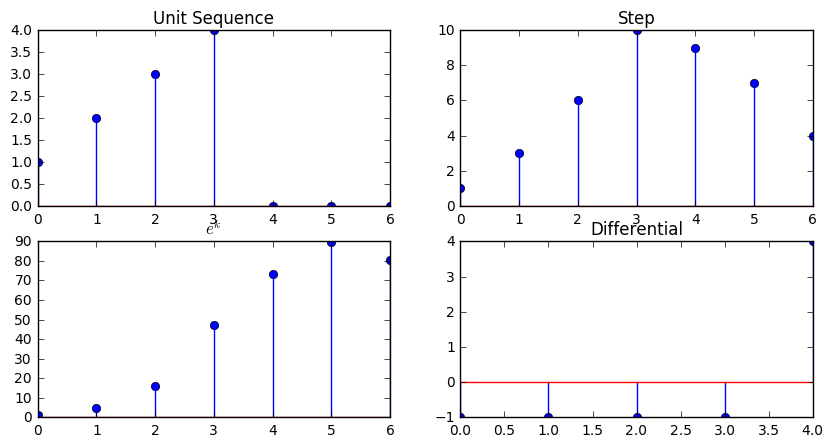

In [33]:

x = np.array([1,2,3,4])
h1 = dirac(0,4)
h2 = step(0,4)
#h1 = np.array([0,1,0])
#h2 = np.array([0,0,0,0,1,1,1,1,1])
h3 = np.exp(np.arange(4))
h4 = np.array([-1,1])
y1= conv_fn(x,h1)
print(y1)
y1 = np.convolve(x,h1)
print(y1)
#print(unit(0,4))
y2 = conv_fn(x,h2)
print(y2)
y2 = np.convolve(x,h2)
print(y2)
y3 = conv_fn(x,h3)
print(y3)
y4 = conv_fn(x,h4)
print(y4)

plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.title("Unit Sequence")
plt.stem(y1)
plt.subplot(2,2,2)
plt.title("Step")
plt.stem(y2)
plt.subplot(2,2,3)
plt.title("$e^k$")
plt.stem(y3)
plt.subplot(2,2,4)
plt.title("Differential")
plt.stem(y4)

<Container object of 3 artists>

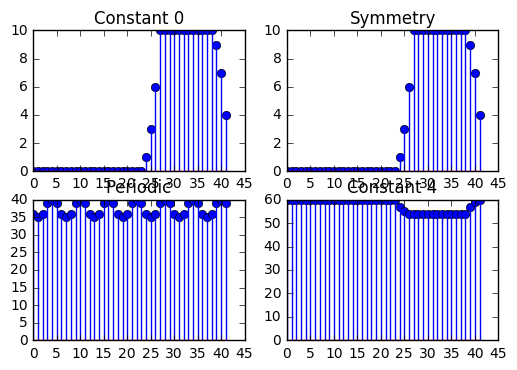

In [34]:
#inlcuding padding
def conv_fn_new(h, x, padding="constant", const_value=0):
    
    if(padding is "symmmetry"):
        x = np.pad(x, h.shape[0]-1, "symmetric")
    elif(padding is "periodic"):
        x = np.pad(x, h.shape[0]-1, "reflect")
    else: 
        x = np.pad(x, h.shape[0]-1, 'constant', constant_values=const_value)
    
    
    y = np.zeros(x.shape)
    
    for n in range(y.shape[0]):
        for k in np.arange(h.shape[0]):
                y[n] += h[k] * x[n-k]
    
    return y
x = np.array([1,2,3,4])

h = step(5, 20)

y1 = conv_fn_new(h, x)
y2 = conv_fn_new(h, x, "symmetry")
y3 = conv_fn_new(h, x, "periodic")
y4 = conv_fn_new(h, x, "constant", 4)

plt.figure()
plt.subplot(2,2,1)
plt.title("Constant 0")
plt.stem(y1)
plt.subplot(2,2,2)
plt.title("Symmetry")
plt.stem(y2)
plt.subplot(2,2,3)
plt.title("Periodic")
plt.stem(y3)
plt.subplot(2,2,4)
plt.title("Constant 4")
plt.stem(y4)

## Exercise 2- 2D Convolution

**2.1** Define a 2D convolution function (Only consider zero-padding the image)

**2.2** Using your function, smooth the `lena` image with the following Gaussian kernel:
$$ K = \frac{1.}{256}\begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}$$

**2.3** Apply sobel filtering using convolution


In [74]:
def conv2d(h, img_a):
    xpad = int((h.shape[0]+1)/2)
    ypad = int((h.shape[1]+1)/2)
    #print(xpad)
    #print(ypad)
    img = np.pad(img_a, ((0,xpad), (0,ypad)),  'constant', constant_values=0)
    #print(img.shape)
    out = np.zeros(img.shape)
    
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            for i in range(h.shape[0]):
                for j in range(h.shape[1]):
                        out[x,y] += h[i,j] * img[x-i,y-j] 
    
    return out[(xpad-1):-(xpad-1), (ypad-1):-(ypad-1)]

(512, 512)
3
3
(515, 515)


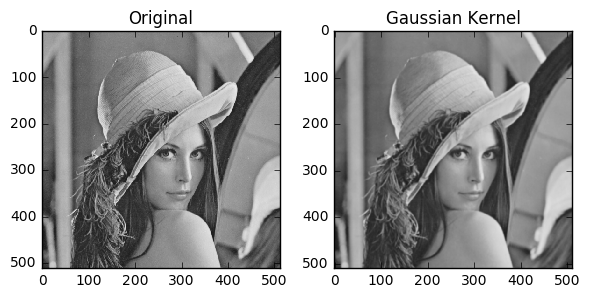

In [77]:
lena_im = img_as_float(io.imread('./../images/lena-grey.bmp', as_grey=True))

print(lena_im.shape)
h = np.array([[1 , 4 , 6 , 4 , 1] ,
[4 , 16 , 24 , 16 , 4] ,
[6 , 24 , 36 , 24 , 6] , 
[4 , 16 , 24 , 16 , 4],  
[1 , 4 , 6 , 4 , 1]])*(1/256.0)

y = conv2d(h, lena_im)

plt.figure()

plt.subplot(1,2,1)
plt.title("Original")
io.imshow(lena_im)

plt.subplot(1,2,2)
plt.title("Gaussian Kernel")
io.imshow(y)

2
2
(514, 514)
2
2
(514, 514)


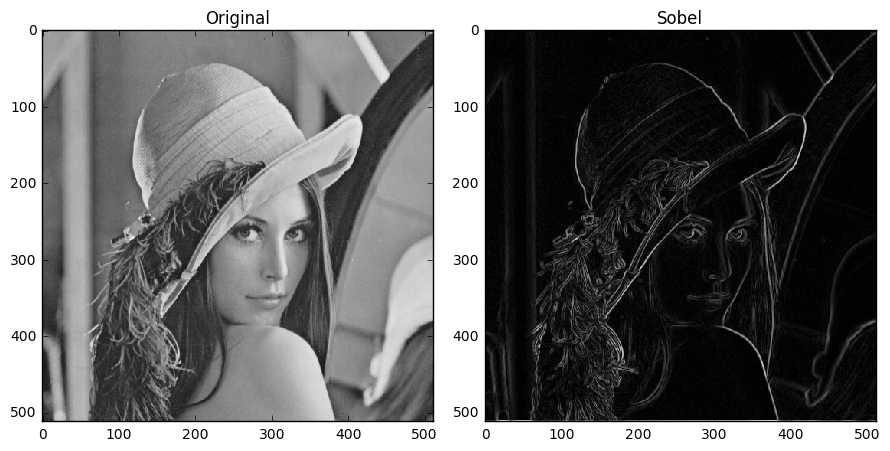

In [79]:
sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

lena_sobel_x = conv2d(sobel_x, lena_im)
lena_sobel_y = conv2d(sobel_y, lena_im)
lena_sobel = np.sqrt(np.power(lena_sobel_x,2) + np.power(lena_sobel_y,2))

lena_sobel /= lena_sobel.max()

plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
plt.title("Original")
io.imshow(lena_im)
plt.subplot(1,2,2)
plt.title("Sobel")
io.imshow(lena_sobel)

## Exercise 3 - Character recognition using cross-correlation

**3.1** load `a.png` and `text.png` images and binarized them using [`threshold_otsu`](http://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=filters#skimage.filters.threshold_otsu)

**3.2** Use [`signal.correlate2d`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.correlate2d.html#scipy.signal.correlate2d) from `scipy` to correlate your binarized images.
**Note, signal correspond to the bright pixels within and image (invert your masks)**

**3.3** Find the first 10 characters recognized as `a`.

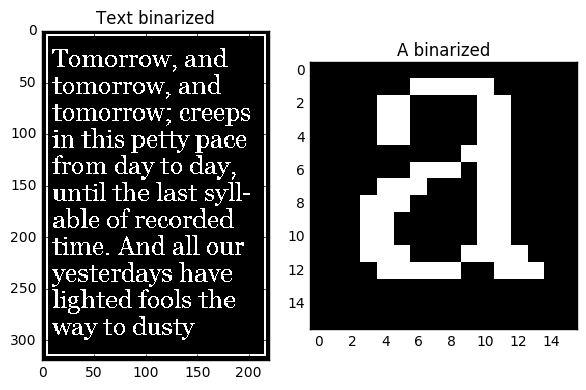

In [92]:
im_a = io.imread('./../images/a.png', as_grey=True)
im_text = io.imread('./../images/text.png', as_grey=True)

im_a = img_as_float(im_a < threshold_otsu(im_a))
im_text = img_as_float(im_text < threshold_otsu(im_text))


plt.figure()
plt.subplot(1,2,1)
plt.title("Text binarized")
io.imshow(im_text)

plt.subplot(1,2,2)
plt.title("A binarized")
io.imshow(im_a)

9080
38 150
64 144
116 175
142 96
142 169
168 130
194 23
220 138
246 103
246 160


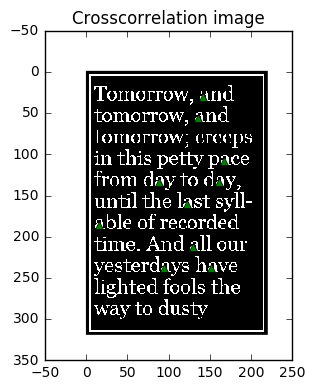

In [129]:
im_correlate = signal.correlate2d(im_text, im_a )
plt.figure()
plt.title("Crosscorrelation image")
io.imshow(im_text)
print(np.argmax(im_correlate))
for i in range(10):
    [r, c] = np.unravel_index(np.argmax(im_correlate), im_correlate.shape)
    print(r,c)
    
    plt.plot(c-im_a.shape[1]/2,r-im_a.shape[1]/2,'g^')
    
    im_correlate[r,c] = im_correlate.min()
    #print(im_correlate)

In [132]:
#checking unravel_index usage
np.unravel_index([1, 2, 3], (3,3))

(array([0, 0, 1]), array([1, 2, 0]))